In [1]:
s = [[2.0], [2.0, 6.0], [2.0, 6.0, 10.0], [2.0, 6.0, 10.0, 14.0], [2.0, 6.0, 10.0, 14.0, 18.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0, 30.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0, 30.0, 34.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0, 30.0, 34.0, 38.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0, 30.0, 34.0, 38.0, 42.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0, 30.0, 34.0, 38.0, 42.0, 46.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0, 30.0, 34.0, 38.0, 42.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0, 30.0, 34.0, 38.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0, 30.0, 34.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0, 30.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0], [2.0, 6.0, 10.0, 14.0, 18.0, 22.0], [2.0, 6.0, 10.0, 14.0, 18.0], [2.0, 6.0, 10.0, 14.0], [2.0, 6.0, 10.0], [2.0, 6.0], [2.0], [4.0], [4.0, 8.0], [4.0, 8.0, 12.0], [4.0, 8.0, 12.0, 16.0], [4.0, 8.0, 12.0, 16.0, 20.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0, 36.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0, 36.0, 40.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0, 36.0, 40.0, 44.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0, 36.0, 40.0, 44.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0, 36.0, 40.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0, 36.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0, 28.0], [4.0, 8.0, 12.0, 16.0, 20.0, 24.0], [4.0, 8.0, 12.0, 16.0, 20.0], [4.0, 8.0, 12.0, 16.0], [4.0, 8.0, 12.0], [4.0, 8.0], [4.0]]
print(len(s))

45


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.fft import rfft, rfftfreq

srcDictFile = "tmp/gatherdata/srcdata.json"
traceDictFile = "tmp/gatherdata/trcdata.json"

gatherDict_f = open(srcDictFile, "r")
traceDict_f = open(traceDictFile, "r")
gatherDict = json.load(gatherDict_f)["gather_dict"]
traceDict  = json.load(traceDict_f)["TraceData"]

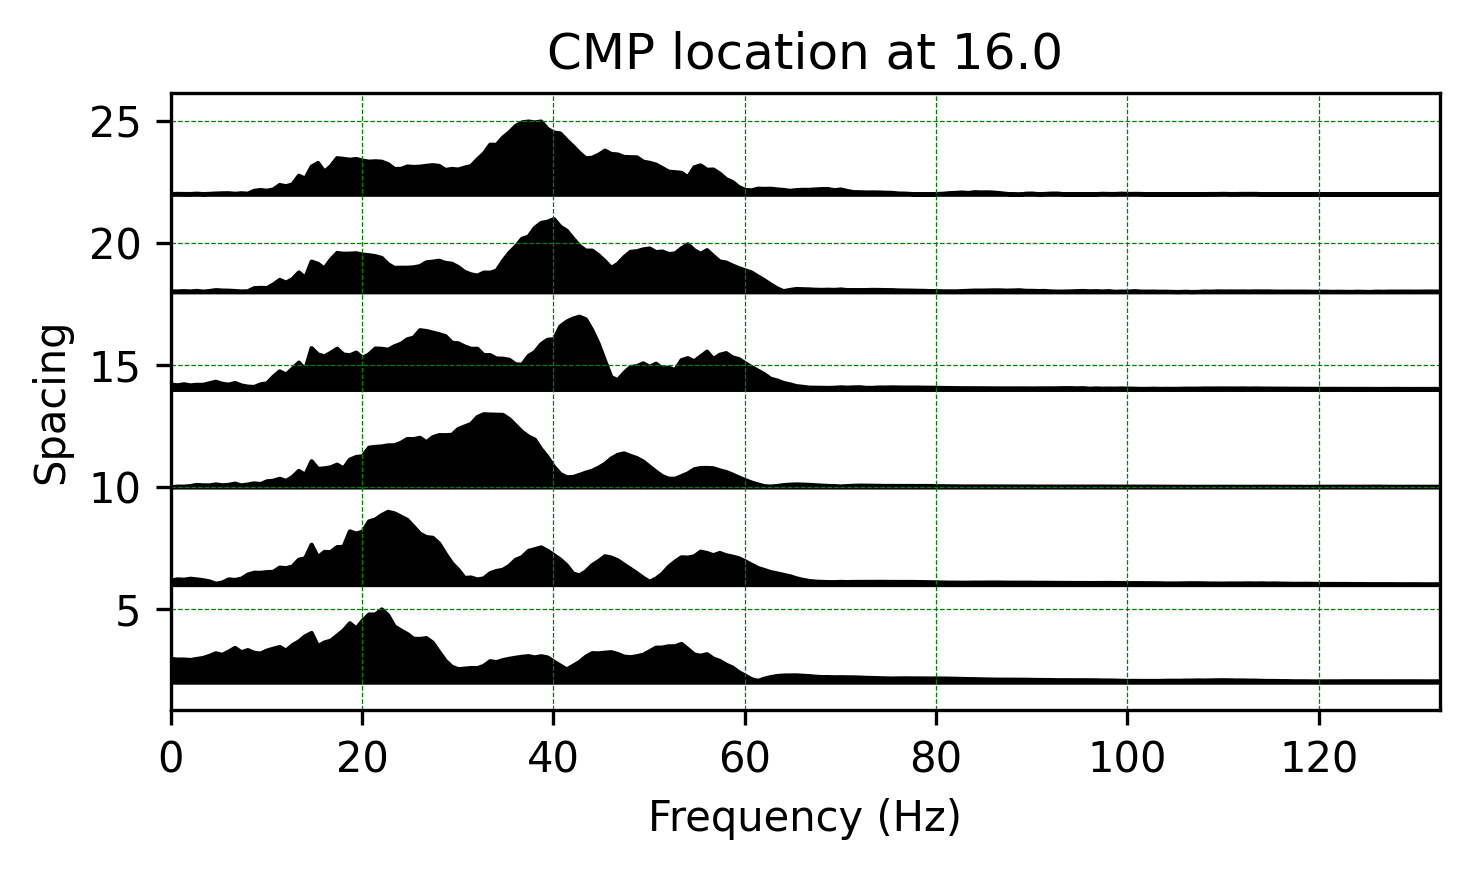

In [20]:
ampfactor = 3
t = np.arange(0, 1500*0.001 , 0.001)

fig, ax = plt.subplots(figsize=(5,3), dpi=300)

            
rcvrs = gatherDict["16.0"]
for k in range(len(rcvrs)):
    traceData = np.array(traceDict[5][k])     
    ffttraceData = rfft(traceData)
    ffttraceDataMeg = abs(ffttraceData)[:200]
    
    freqx = rfftfreq(traceData.size, 0.001)[:200]          
    ffttraceDataMeg = (ampfactor * ffttraceDataMeg / max(ffttraceDataMeg)) + rcvrs[k]
    ax.fill_between(freqx, rcvrs[k], y2=ffttraceDataMeg, where=ffttraceDataMeg>rcvrs[k], interpolate=True, color="black")
    ax.grid(linestyle="--", linewidth="0.3", color="g")
    ax.set_xlim([np.min(freqx), np.max(freqx)])

labels = ["Spacing", "CMP location at ", "/cmpcc-"]
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel(labels[0])
ax.set_title(labels[1]+str("16.0"))
plt.tight_layout()
plt.show()

In [18]:
print(freqx.size)

751


In [19]:
print(1500/2)

750.0


In [1]:
from src.writelog import sysParam

cdc = sysParam()
print(cdc.GFRAME.AquGeom.gather.w)
cdc.write(cdc.GFRAME.AquGeom.gather.w, 120)
#cdc.GFRAME.AquGeom.gather.w = 120
print(cdc.GFRAME.AquGeom.gather.w)


100
100


In [1]:
from attrdict import AttrDict

data = AttrDict({"w": 400, "h" : 400, "dpi": 100})
print(data)

data.w = 100

print(data)

AttrDict({'w': 400, 'h': 400, 'dpi': 100})
AttrDict({'w': 100, 'h': 400, 'dpi': 100})


In [59]:
print(np.array(list(map(float, "50,50, 50,50".split(",")))))

[50. 50. 50. 50.]


In [13]:
import pandas as pd

file = pd.read_excel("C:/Users/Admin/Desktop/all file _ folder/QT/data/modelformat1.xlsx")
print(file)

   zinf  zsup  vpinf  vpsup  vsinf  vssup  rhinf  rhsup
0   0.0   0.2    1.2    2.4    0.3    1.0    1.2    2.1
1   0.2   0.6    2.0    2.8    0.5    1.5    1.8    2.5
2   0.6   1.0    2.8    3.5    1.0    1.9    1.8    2.5
3   NaN   NaN    5.0    6.0    2.5    3.4    2.0    2.8


In [11]:
ineEdit = "0.1, 0.0, 0.5"
import numpy as np
ebs = list(map(float, ineEdit.split(",")))
#ebs = np.array(ineEdit, dtype=float)
print(ebs)

[0.1, 0.0, 0.5]


In [12]:
if np.all(ebs) > 0.0:
    print("cholbe")
else:
    print("na")

na


In [40]:
inflist = []
suplist=[]
dflag=2
eb = 50
header = ["zinf", "zsup", "vpinf", "vssup", "vsinf", "vpsup", "rhinf", "rhsup"]
for key in header:
    if "inf" in key:
        suplist.append(file[key].to_numpy() * (100 + eb)/100)


In [41]:
print(suplist)

[array([0. , 0.3, 0.9, nan]), array([1.8, 3. , 4.2, 7.5]), array([0.45, 0.75, 1.5 , 3.75]), array([1.8, 2.7, 2.7, 3. ])]


In [42]:
ebs=np.array([])
print(ebs.size)

0


In [45]:
print(len(list(file.columns.values)))

8


In [55]:
array = [5,6,4]
data=np.array([])
for d in array:
    data = np.hstack((data, (d,d)))
print(data)

[5. 5. 6. 6. 4. 4.]


In [53]:
def zstep(array):
        depthdata=np.array([0])
        for d in array[:-1]:
            depthdata = np.hstack((depthdata, (d,d)))
        depthdata = np.hstack((depthdata, array[-1]))
        return depthdata

In [54]:
print(zstep(array=array))

[0 5 5 6 6 4]


In [1]:
from res import writelog
p = writelog.sysParam()


print(p.getrootdir())

tmp


In [4]:
import os
#f = 
print(next(os.walk("tmp"))[1])

['gatherdata', 'gather_img']


In [25]:
print(float("5"))

5.0


In [22]:
import matplotlib.pyplot as plt
import json
import numpy as np
with open("tmp/inversion/inverRes.json") as f:
    jobj = json.load(f)
    f.close()
    cmps = np.array(list(map(float, jobj.keys())))
    cmps = np.short(cmps)

    #plt.contourf()


In [26]:
vp_model, vs_model, rh_model = np.array([]), np.array([]), np.array([])
z_model =  np.array([])
cmp_model =  np.array([])
#print( jobj)
for cmp in cmps:
    data = jobj[f"{float(cmp)}"]  # data -> dict() , contained keys -> z, vp, vs, rh
    z = data["z"]
    vp = data["vp"]
    vs = data["vs"]
    rh = data["rh"]
    z_model = np.hstack((z_model, z))
    vp_model = np.hstack((vp_model, vp))
    vs_model = np.hstack((vs_model, vs))
    rh_model = np.hstack((rh_model, rh))

    cmp_model =  np.hstack((cmp_model, np.ones(len(z))*cmp))



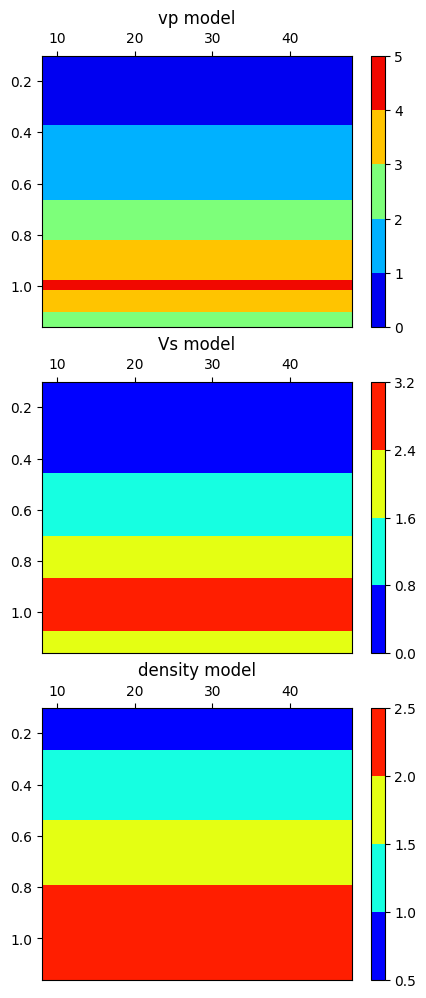

In [27]:
fig, ax = plt.subplots(3, 1, figsize=(5,12) )
cc1 = ax[0].tricontourf(cmp_model, z_model, vp_model, levels=3, cmap="jet")
ax[0].invert_yaxis()
ax[0].xaxis.tick_top()
ax[0].set_title("vp model")
cbar1 = plt.colorbar(cc1, ax=ax[0])

cc2 = ax[1].tricontourf(cmp_model, z_model, vs_model, levels=3, cmap="jet")
ax[1].invert_yaxis()
ax[1].xaxis.tick_top()
ax[1].set_title("Vs model")
cbar2 = plt.colorbar(cc2, ax=ax[1])

cc = ax[2].tricontourf(cmp_model, z_model, rh_model, levels=3, cmap="jet")
ax[2].invert_yaxis()
ax[2].xaxis.tick_top()
ax[2].set_title("density model")
cbar2 = plt.colorbar(cc, ax=ax[2])
plt.show()